In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
from dateutil import parser
import re

In [26]:
tweets2 = pd.read_csv('trump_tweets_cleaned_for_sentiment_analysis.csv', encoding='UTF-8')

tweets2

,id,text,favorites,retweets,date,tweet_datetime,date_part,time_part,hour,year,month
0,9.353400e+17,Thank you Rand!,42793,9125,2017-11-28 02:50:00,2017-11-28 10:50:00,2017-11-28,10:50:00,10,2017,11
1,8.997980e+17,"Join me live from Fort Myer in Arlington, Virg...",36009,4891,2017-08-22 01:00:00,2017-08-22 09:00:00,2017-08-22,09:00:00,9,2017,8
2,8.939700e+17,Thank you Nicole!,43367,8275,2017-05-08 23:01:00,2017-05-09 07:01:00,2017-05-09,07:01:00,7,2017,5
3,8.819770e+17,Thank you to Shawn Steel for the nice words on .,50956,7465,2017-03-07 20:44:00,2017-03-08 04:44:00,2017-03-08,04:44:00,4,2017,3
4,8.778460e+17,Great night in Iowa - special people. Thank you!,56446,8039,2017-06-22 11:11:00,2017-06-22 19:11:00,2017-06-22,19:11:00,19,2017,6
...,...,...,...,...,...,...,...,...,...,...,...
2749,9.990960e+17,If the person placed very early into my campai...,78529,20098,2018-05-23 01:13:00,2018-05-23 09:13:00,2018-05-23,09:13:00,9,2018,5
2750,9.874600e+17,So General Michael Flynn’s life can be totally...,93569,25259,2018-04-20 10:34:00,2018-04-20 18:34:00,2018-04-20,18:34:00,18,2018,4
2751,9.870960e+17,"My thoughts, prayers and condolences are with ...",62645,16081,2018-04-19 22:30:00,2018-04-20 06:30:00,2018-04-20,06:30:00,6,2018,4
2752,9.863570e+17,Today’s Court decision means that Congress mus...,56749,12426,2018-04-17 21:34:00,2018-04-18 05:34:00,2018-04-18,05:34:00,5,2018,4


In [27]:
tweets2018 = tweets2[tweets2['year'] == 2018]
tweets2017 = tweets2[tweets2['year'] == 2017]

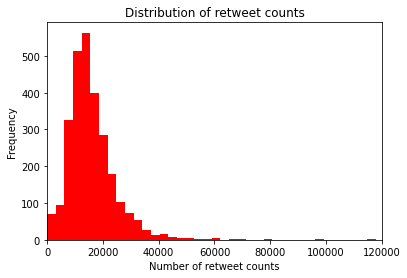

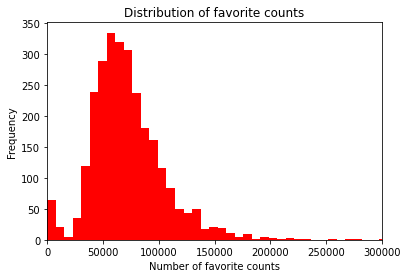

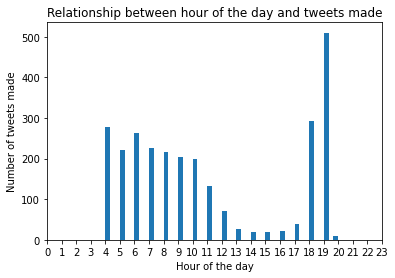

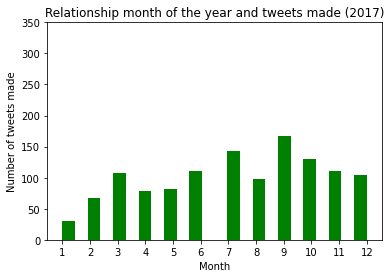

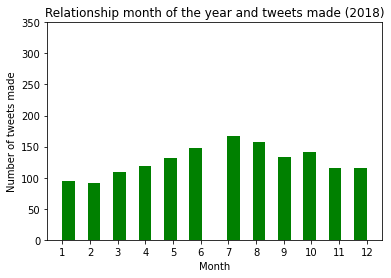

In [28]:
plt.hist(tweets2.retweets, bins = 70, color = 'red')
plt.xlim(left=0, right=120000)
plt.title('Distribution of retweet counts')
plt.xlabel('Number of retweet counts')
plt.ylabel('Frequency')
plt.show()

plt.hist(tweets2.favorites, bins = 70, color = 'red')
plt.xlim(left=0, right=300000)
plt.title('Distribution of favorite counts')
plt.xlabel('Number of favorite counts')
plt.ylabel('Frequency')
plt.show()

plt.hist(tweets2.hour, bins = 48)
plt.xlim(left=0, right=23)
plt.title('Relationship between hour of the day and tweets made')
plt.xlabel('Hour of the day')
plt.ylabel('Number of tweets made')
plt.xticks(range(0,24))
plt.show()

plt.hist(tweets2017.month, bins = 24, color = 'green')
plt.title('Relationship month of the year and tweets made (2017)')
plt.xlabel('Month')
plt.ylabel('Number of tweets made')
plt.xticks(range(1,13))
plt.yticks(range(0,400,50))
plt.show()

plt.hist(tweets2018.month, bins = 24, color = 'green')
plt.title('Relationship month of the year and tweets made (2018)')
plt.xlabel('Month')
plt.ylabel('Number of tweets made')
plt.xticks(range(1,13))
plt.yticks(range(0,400,50))
plt.show()

In [29]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
tweets2['sentiment_score'] = tweets2['text'].astype(str).apply(sid.polarity_scores)
tweets2['compound'] = [i['compound'] for i in tweets2['sentiment_score']]

tweets2

,id,text,favorites,retweets,date,tweet_datetime,date_part,time_part,hour,year,month,sentiment_score,compound
0,9.353400e+17,Thank you Rand!,42793,9125,2017-11-28 02:50:00,2017-11-28 10:50:00,2017-11-28,10:50:00,10,2017,11,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.4199
1,8.997980e+17,"Join me live from Fort Myer in Arlington, Virg...",36009,4891,2017-08-22 01:00:00,2017-08-22 09:00:00,2017-08-22,09:00:00,9,2017,8,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...",0.2960
2,8.939700e+17,Thank you Nicole!,43367,8275,2017-05-08 23:01:00,2017-05-09 07:01:00,2017-05-09,07:01:00,7,2017,5,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.4199
3,8.819770e+17,Thank you to Shawn Steel for the nice words on .,50956,7465,2017-03-07 20:44:00,2017-03-08 04:44:00,2017-03-08,04:44:00,4,2017,3,"{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'comp...",0.6486
4,8.778460e+17,Great night in Iowa - special people. Thank you!,56446,8039,2017-06-22 11:11:00,2017-06-22 19:11:00,2017-06-22,19:11:00,19,2017,6,"{'neg': 0.0, 'neu': 0.343, 'pos': 0.657, 'comp...",0.8622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749,9.990960e+17,If the person placed very early into my campai...,78529,20098,2018-05-23 01:13:00,2018-05-23 09:13:00,2018-05-23,09:13:00,9,2018,5,"{'neg': 0.052, 'neu': 0.847, 'pos': 0.1, 'comp...",0.6792
2750,9.874600e+17,So General Michael Flynn’s life can be totally...,93569,25259,2018-04-20 10:34:00,2018-04-20 18:34:00,2018-04-20,18:34:00,18,2018,4,"{'neg': 0.081, 'neu': 0.891, 'pos': 0.028, 'co...",-0.6689
2751,9.870960e+17,"My thoughts, prayers and condolences are with ...",62645,16081,2018-04-19 22:30:00,2018-04-20 06:30:00,2018-04-20,06:30:00,6,2018,4,"{'neg': 0.086, 'neu': 0.749, 'pos': 0.164, 'co...",0.6900
2752,9.863570e+17,Today’s Court decision means that Congress mus...,56749,12426,2018-04-17 21:34:00,2018-04-18 05:34:00,2018-04-18,05:34:00,5,2018,4,"{'neg': 0.314, 'neu': 0.577, 'pos': 0.109, 'co...",-0.9493


In [30]:
tweets2.to_csv("sentiment_analysis_output.csv", index=False, header=True)